<a href="https://colab.research.google.com/github/abir-mahamud/Covid-19/blob/master/Covid_19PredictBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel(r'/per_day_cases.xlsx',parse_dates=True, sheet_name="Bangladesh")

In [ ]:
df['Recovered'] = df['Total Cases'] - (df['Active Cases'] + df['Total Death'])
df.tail()

,Date,Total Cases,New Cases,Days after surpassing 100 cases,Total Death,New Death,Active Cases,Recovered
72,2020-05-27,38292,1541,51.0,544,22,29823,7925
73,2020-05-28,40321,2029,52.0,559,15,31337,8425
74,2020-05-29,42844,2523,53.0,582,23,33247,9015
75,2020-05-30,44608,1764,54.0,610,28,34623,9375
76,2020-05-31,47153,2545,55.0,650,40,36722,9781


In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = df.groupby('Date').sum()['Total Cases'].reset_index()
deaths = df.groupby('Date').sum()['Total Death'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed = df.groupby('Date').sum()['Total Cases'].reset_index()
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
72,2020-05-27,38292
73,2020-05-28,40321
74,2020-05-29,42844
75,2020-05-30,44608
76,2020-05-31,47153


In [ ]:
confirmed.tail()

,ds,y
72,2020-05-27,38292
73,2020-05-28,40321
74,2020-05-29,42844
75,2020-05-30,44608
76,2020-05-31,47153


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=5)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
77,2020-06-01
78,2020-06-02
79,2020-06-03
80,2020-06-04
81,2020-06-05


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
77,2020-06-01,47240.437497,46624.830827,47809.873040
78,2020-06-02,48833.472367,48200.437718,49399.633392
79,2020-06-03,50517.860577,49815.383914,51228.919431
80,2020-06-04,52254.066969,51476.978532,53055.059098
81,2020-06-05,54032.950237,53105.716129,55045.968509


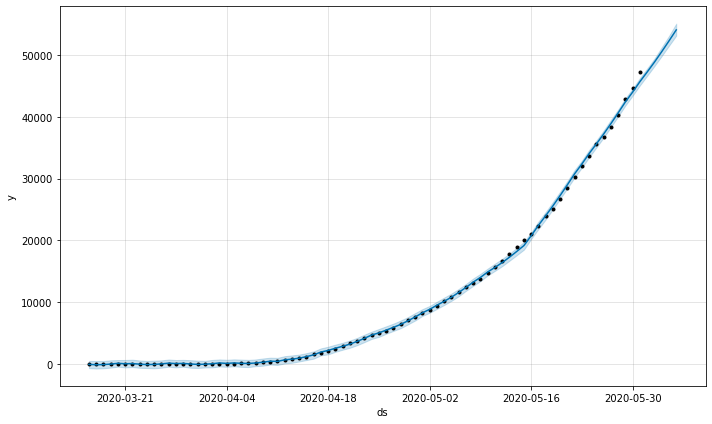

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

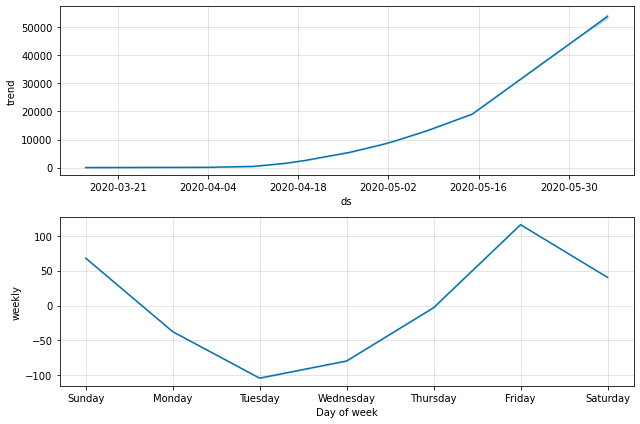

In [ ]:
confirmed_forecast_plot = m.plot_components(forecast)

In [ ]:
dailycases = df.groupby('Date').sum()['New Cases'].reset_index()
dailycases.columns = ['ds','y']
#DailyCases['ds'] = dailycases['ds'].dt.date
dailycases['ds'] = pd.to_datetime(dailycases['ds'])
dailycases.tail()

,ds,y
72,2020-05-27,1541
73,2020-05-28,2029
74,2020-05-29,2523
75,2020-05-30,1764
76,2020-05-31,2545


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(dailycases)
future = m.make_future_dataframe(periods=5)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
77,2020-06-01
78,2020-06-02
79,2020-06-03
80,2020-06-04
81,2020-06-05


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
77,2020-06-01,2154.648996,1874.045654,2457.456508
78,2020-06-02,2079.417085,1775.227321,2354.869529
79,2020-06-03,2193.637352,1893.328952,2485.013639
80,2020-06-04,2268.222258,1970.213218,2574.010615
81,2020-06-05,2343.896398,2030.576022,2653.742383


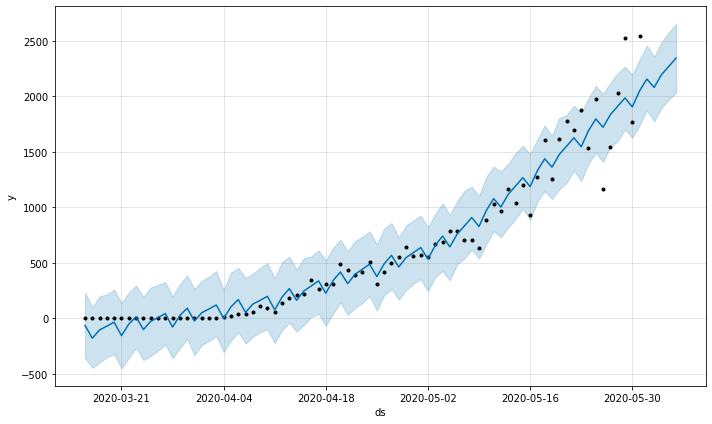

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

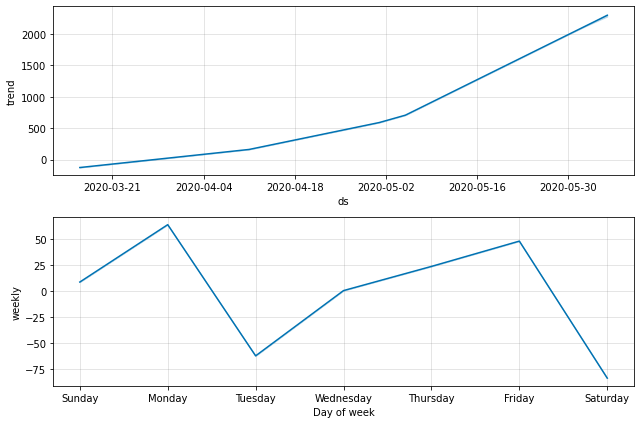

In [ ]:
confirmed_forecast_plot=m.plot_components(forecast)

In [ ]:
daily_death=df.groupby('Date').sum()['New Death'].reset_index()
daily_death.columns=(['ds','y'])
#daily_death['ds'] = daily_death['ds'].dt.date
daily_death['ds']=pd.to_datetime(daily_death['ds'])
daily_death.tail()

,ds,y
72,2020-05-27,22
73,2020-05-28,15
74,2020-05-29,23
75,2020-05-30,28
76,2020-05-31,40


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(daily_death)
future = m.make_future_dataframe(periods=5)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
77,2020-06-01
78,2020-06-02
79,2020-06-03
80,2020-06-04
81,2020-06-05


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
77,2020-06-01,25.652656,18.364882,33.106078
78,2020-06-02,25.373280,17.916777,32.040704
79,2020-06-03,26.515286,19.225022,33.562212
80,2020-06-04,27.020925,20.080296,33.661482
81,2020-06-05,27.617468,20.480638,34.847713


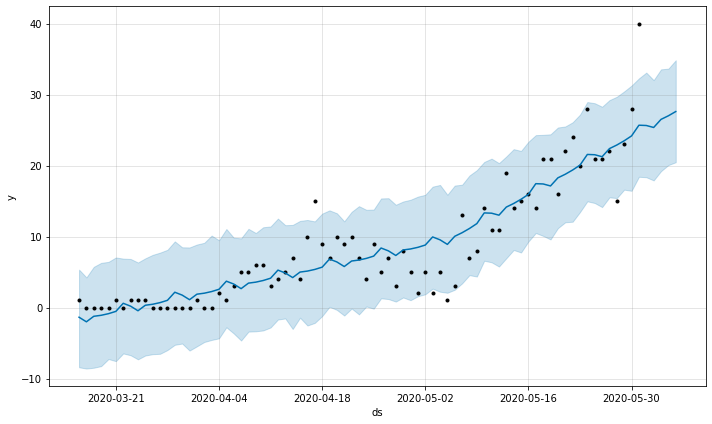

In [ ]:
daily_death_forecast_plot=m.plot(forecast)

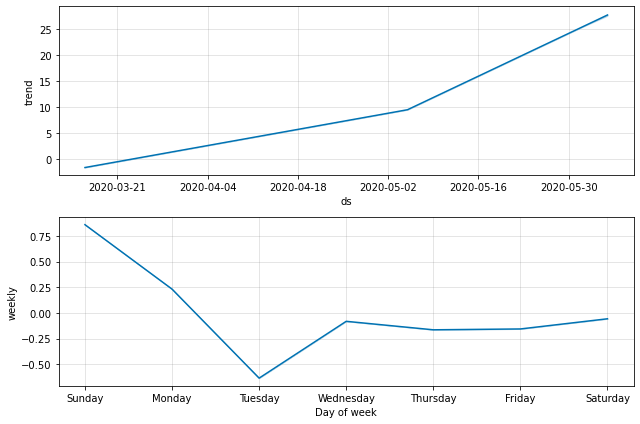

In [ ]:
daily_death_forecast_plot=m.plot_components(forecast)

In [ ]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

#This cell's code is required when you are working with plotly on colab
plotly.io.renderers.default = 'colab'

fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['ds'], y=confirmed['y'], mode='lines+markers', name='confirmed', line=dict(color='blue', width=2)))

In [ ]:
url='https://www.worldometers.info/coronavirus/.html'

In [ ]:
import pandas as pd

import requests
from bs4 import BeautifulSoup

from tabulate import tabulate

r = requests.get("https://www.worldometers.info/coronavirus/")
b = BeautifulSoup(r.content, 'lxml')
t = b.find_all('table')[0]
p = pd.read_html(str(t))
i = (tabulate(p[0], headers='abc', tablefmt='qsl'))
print(i)

                                                                                                                                             a       b                 c
---  ---  ----------------------  -------  -------  ------  ---  ----------------  ----------------  -----  -------  -------  ----------------  ------  ----------------
  0  nan  World                   6190767  +40,285  371465  959       2.75898e+06       3.06032e+06  53481    794      47.7      nan               nan     nan
  1    1  USA                     1817409  +589     105575   18  535361                 1.17647e+06  17163   5493     319          1.72749e+07   52216       3.30838e+08
  2    2  Brazil                   501985  +3,545    28872   38  205371            267742             8318   2363     136     930013              4378       2.1243e+08
  3    3  Russia                   405843  +9,268     4693  138  171883            229267             2300   2781      32          1.06431e+07   72933       1.45929e+